In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset1.csv
/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1 = pd.read_csv("/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv")
df2 = pd.read_csv("/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset1.csv")


In [7]:
merged_df = pd.merge(df1, df2[['job_id', 'salary_local']], on='job_id', how='inner')

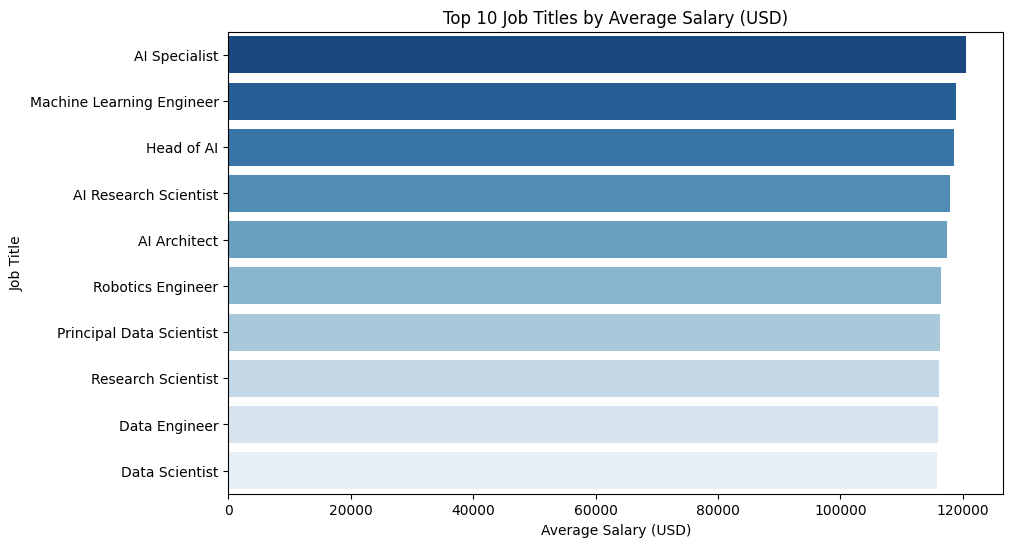

In [9]:
#Average Salary by Job Title
avg_salary_by_title = (
    merged_df.groupby("job_title")["salary_usd"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, palette="Blues_r")
plt.title("Top 10 Job Titles by Average Salary (USD)")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Job Title")
plt.show()

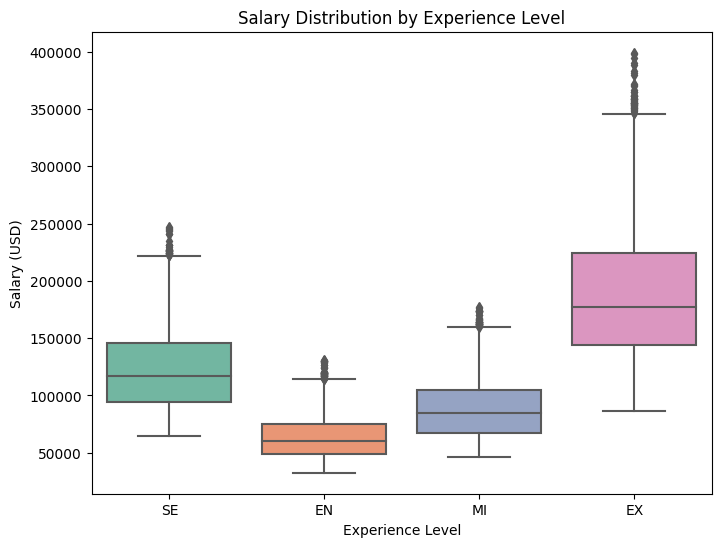

In [10]:
# Salary Distribution by Experience Level
plt.figure(figsize=(8,6))
sns.boxplot(x="experience_level", y="salary_usd", data=merged_df, palette="Set2")
plt.title("Salary Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()

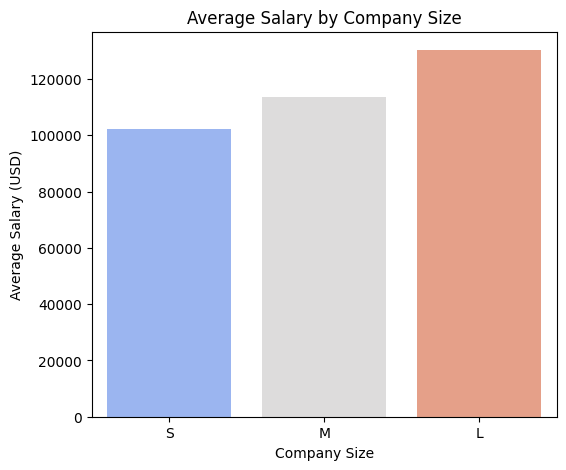

In [11]:
# Average Salary by Company Size
avg_salary_by_size = (
    merged_df.groupby("company_size")["salary_usd"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(6,5))
sns.barplot(x=avg_salary_by_size.index, y=avg_salary_by_size.values, palette="coolwarm")
plt.title("Average Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Average Salary (USD)")
plt.show()

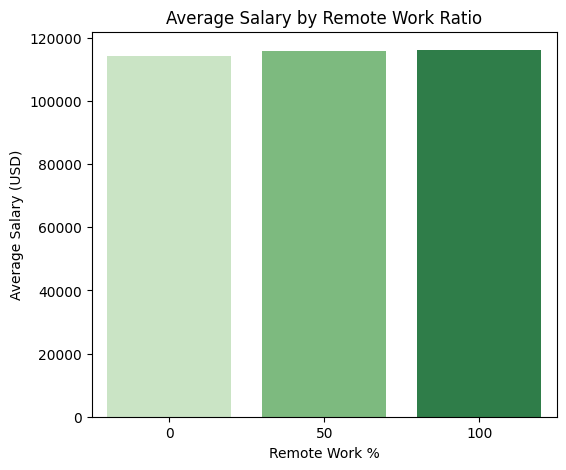

In [12]:
# Remote Work Impact on Salary
avg_salary_remote = (
    merged_df.groupby("remote_ratio")["salary_usd"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(6,5))
sns.barplot(x=avg_salary_remote.index, y=avg_salary_remote.values, palette="Greens")
plt.title("Average Salary by Remote Work Ratio")
plt.xlabel("Remote Work %")
plt.ylabel("Average Salary (USD)")
plt.show()

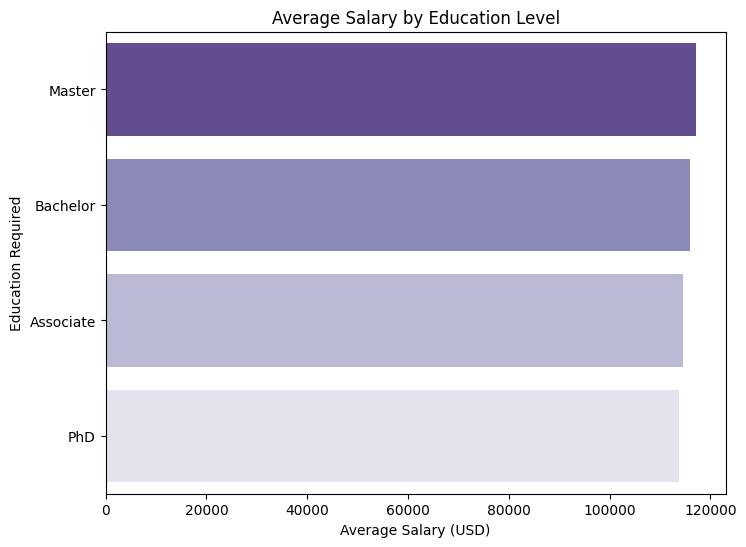

In [13]:
# Education Requirement vs Salary
avg_salary_edu = (
    merged_df.groupby("education_required")["salary_usd"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,6))
sns.barplot(x=avg_salary_edu.values, y=avg_salary_edu.index, palette="Purples_r")
plt.title("Average Salary by Education Level")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Education Required")
plt.show()

In [14]:
# Final Preview of the Data
print("Final merged dataset preview:")
print(merged_df.head())

Final merged dataset preview:
    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             0   
3              Ind